In [1]:
import tensorflow as tf 
from tensorflow.keras.applications import MobileNetV2 
# Load the pre-trained MobileNetV2 model, excluding the top classification layer 
base_model = MobileNetV2(input_shape=(96, 96, 3), include_top=False, weights='imagenet')
# Freeze the base model 
base_model.trainable = False 

In [2]:
from tensorflow.keras.models import Model  
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dense 
# Create new model on top 
inputs = Input(shape=(96, 96, 3)) 
x = base_model(inputs) 
x = GlobalAveragePooling2D()(x) 
outputs = Dense(10, activation='softmax')(x) 
model = Model(inputs, outputs)  

In [3]:
from tensorflow.keras.datasets import cifar10 
from tensorflow.keras.utils import to_categorical  
# Load CIFAR-10 data 
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()  
# Normalize pixel values to be between 0 and 1 
train_images, test_images = train_images / 255.0, test_images / 255.0  
# Convert labels to one-hot encoding 
train_labels = to_categorical(train_labels, 10) 
test_labels = to_categorical(test_labels, 10)  
# Resize images from 32x32 to 96x96 to fit MobileNetV2 input size requirements 
train_images_resized = tf.image.resize(train_images, (96, 96)) 
test_images_resized = tf.image.resize(test_images, (96, 96))

In [4]:
from tensorflow.keras.optimizers import Adam 
# Compile the model 
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])  
# Train the model 
model.fit(train_images_resized, train_labels,epochs=4,batch_size = 128,validation_split=0.3, )  
# Evaluate the model 
model.evaluate(test_images_resized, test_labels) 

Epoch 1/4


2023-12-08 05:00:05.867039: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


274/274 [==============================] - 112s 403ms/step - loss: 0.8943 - accuracy: 0.6904 - val_loss: 0.6830 - val_accuracy: 0.7639
Epoch 2/4
274/274 [==============================] - 107s 389ms/step - loss: 0.6323 - accuracy: 0.7827 - val_loss: 0.6245 - val_accuracy: 0.7839
Epoch 3/4
274/274 [==============================] - 106s 386ms/step - loss: 0.5753 - accuracy: 0.8007 - val_loss: 0.5947 - val_accuracy: 0.7942
Epoch 4/4
313/313 [==============================] - 25s 81ms/step - loss: 0.5761 - accuracy: 0.8022


[0.5761321783065796, 0.8022000193595886]

In [5]:
test_loss, test_accuracy = model.evaluate(test_images_resized, test_labels)
print(f"Test Accuracy: {test_accuracy}")



313/313 [==============================] - 25s 81ms/step - loss: 0.5761 - accuracy: 0.8022
Test Accuracy: 0.8022000193595886


Epoch 1/5
274/274 [==============================] - 108s 394ms/step - loss: 0.5169 - accuracy: 0.8207 - val_loss: 0.5726 - val_accuracy: 0.8005
Epoch 2/5
274/274 [==============================] - 118s 431ms/step - loss: 0.4984 - accuracy: 0.8283 - val_loss: 0.5691 - val_accuracy: 0.8009
Epoch 3/5
274/274 [==============================] - 786s 3s/step - loss: 0.4851 - accuracy: 0.8335 - val_loss: 0.5663 - val_accuracy: 0.8045
Epoch 4/5
274/274 [==============================] - 107s 392ms/step - loss: 0.4725 - accuracy: 0.8364 - val_loss: 0.5782 - val_accuracy: 0.7982
Epoch 5/5
274/274 [==============================] - 113s 412ms/step - loss: 0.4634 - accuracy: 0.8394 - val_loss: 0.5739 - val_accuracy: 0.8005


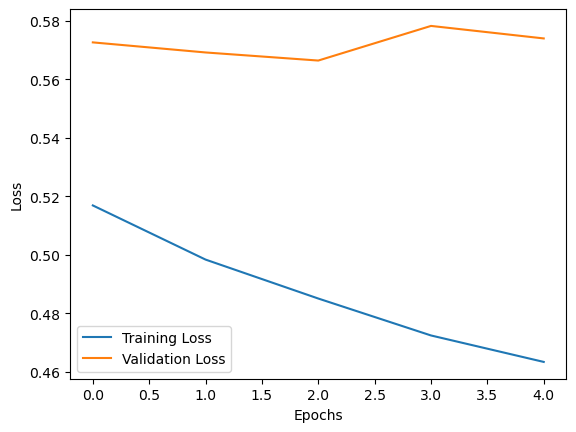

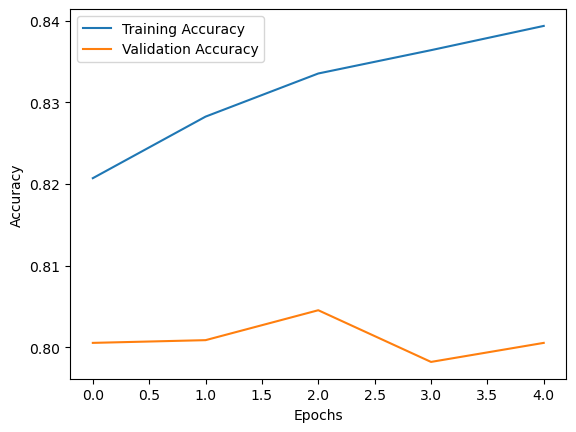

In [6]:
history = model.fit(
    train_images_resized, train_labels,
    epochs=5,
    batch_size=128,
    validation_split=0.3,
)

# Plotting training and validation loss
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plotting training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


11490434/11490434 [==============================] - 2s 0us/step



Training model with Learning Rate: 0.001

Epoch 1/10
1875/1875 [==============================] - 2s 959us/step - loss: 0.2922 - accuracy: 0.9150 - val_loss: 0.1400 - val_accuracy: 0.9584
Epoch 2/10
1875/1875 [==============================] - 2s 864us/step - loss: 0.1407 - accuracy: 0.9582 - val_loss: 0.1021 - val_accuracy: 0.9685
Epoch 3/10
1875/1875 [==============================] - 2s 868us/step - loss: 0.1052 - accuracy: 0.9677 - val_loss: 0.0929 - val_accuracy: 0.9709
Epoch 4/10
1875/1875 [==============================] - 2s 934us/step - loss: 0.0867 - accuracy: 0.9728 - val_loss: 0.0769 - val_accuracy: 0.9751
Epoch 5/10
1875/1875 [==============================] - 2s 892us/step - loss: 0.0728 - accuracy: 0.9770 - val_loss: 0.0783 - val_accuracy: 0.9767
Epoch 6/10
1875/1875 [==============================] - 2s 889us/step - loss: 0.0631 - accuracy: 0.9798 - val_loss: 0.0773 - val_accuracy: 0.9756
Epoch 7/10
1875/1875 [==============================] - 2s 892us/step - loss: 0.0

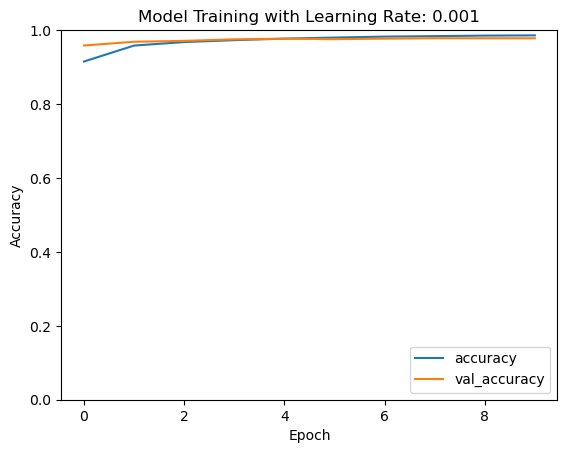


Training model with Learning Rate: 0.01

Epoch 1/10
1875/1875 [==============================] - 2s 920us/step - loss: 0.3160 - accuracy: 0.9067 - val_loss: 0.1653 - val_accuracy: 0.9499
Epoch 2/10
1875/1875 [==============================] - 2s 889us/step - loss: 0.2434 - accuracy: 0.9318 - val_loss: 0.1458 - val_accuracy: 0.9592
Epoch 3/10
1875/1875 [==============================] - 2s 913us/step - loss: 0.2207 - accuracy: 0.9393 - val_loss: 0.1760 - val_accuracy: 0.9558
Epoch 4/10
1875/1875 [==============================] - 2s 900us/step - loss: 0.2172 - accuracy: 0.9424 - val_loss: 0.1713 - val_accuracy: 0.9590
Epoch 5/10
1875/1875 [==============================] - 2s 874us/step - loss: 0.2129 - accuracy: 0.9460 - val_loss: 0.1799 - val_accuracy: 0.9579
Epoch 6/10
1875/1875 [==============================] - 2s 889us/step - loss: 0.2006 - accuracy: 0.9469 - val_loss: 0.2019 - val_accuracy: 0.9592
Epoch 7/10
1875/1875 [==============================] - 2s 882us/step - loss: 0.20

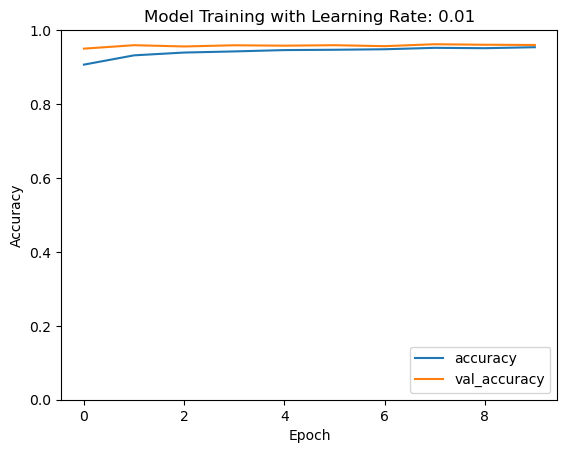


Training model with Learning Rate: 0.1

Epoch 1/10
1875/1875 [==============================] - 2s 901us/step - loss: 1.9287 - accuracy: 0.2973 - val_loss: 1.9132 - val_accuracy: 0.2564
Epoch 2/10
1875/1875 [==============================] - 2s 856us/step - loss: 1.9834 - accuracy: 0.2684 - val_loss: 1.9422 - val_accuracy: 0.2617
Epoch 3/10
1875/1875 [==============================] - 2s 909us/step - loss: 2.0048 - accuracy: 0.2511 - val_loss: 2.0403 - val_accuracy: 0.2642
Epoch 4/10
1875/1875 [==============================] - 2s 847us/step - loss: 1.9699 - accuracy: 0.2622 - val_loss: 1.8714 - val_accuracy: 0.3003
Epoch 5/10
1875/1875 [==============================] - 2s 847us/step - loss: 2.0021 - accuracy: 0.2530 - val_loss: 1.9189 - val_accuracy: 0.3021
Epoch 6/10
1875/1875 [==============================] - 2s 848us/step - loss: 1.9946 - accuracy: 0.2501 - val_loss: 2.0044 - val_accuracy: 0.2347
Epoch 7/10
1875/1875 [==============================] - 2s 847us/step - loss: 1.979

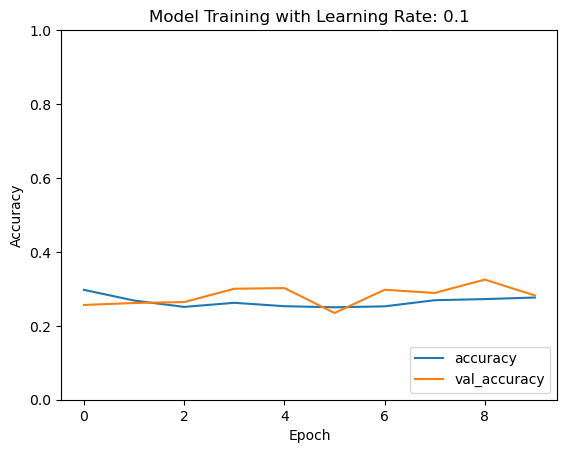


Training model with 5 Epochs

Epoch 1/5
1875/1875 [==============================] - 2s 932us/step - loss: 0.2976 - accuracy: 0.9138 - val_loss: 0.1380 - val_accuracy: 0.9596
Epoch 2/5
1875/1875 [==============================] - 2s 855us/step - loss: 0.1426 - accuracy: 0.9580 - val_loss: 0.0955 - val_accuracy: 0.9710
Epoch 3/5
1875/1875 [==============================] - 2s 877us/step - loss: 0.1065 - accuracy: 0.9673 - val_loss: 0.0881 - val_accuracy: 0.9720
Epoch 4/5
1875/1875 [==============================] - 2s 838us/step - loss: 0.0892 - accuracy: 0.9729 - val_loss: 0.0764 - val_accuracy: 0.9759
Epoch 5/5
1875/1875 [==============================] - 2s 838us/step - loss: 0.0751 - accuracy: 0.9759 - val_loss: 0.0751 - val_accuracy: 0.9773
Training completed.



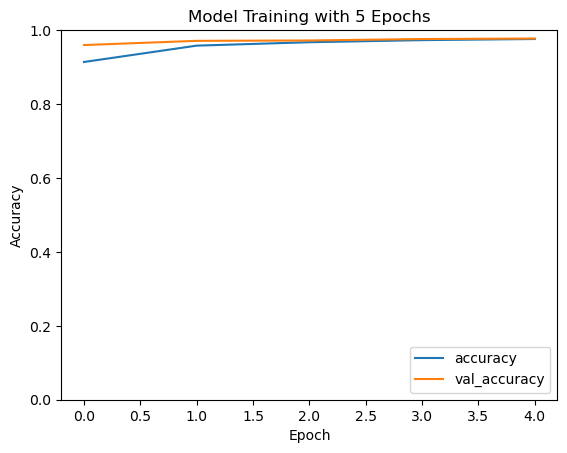


Training model with 10 Epochs

Epoch 1/10
1875/1875 [==============================] - 2s 926us/step - loss: 0.2939 - accuracy: 0.9143 - val_loss: 0.1433 - val_accuracy: 0.9570
Epoch 2/10
1875/1875 [==============================] - 2s 880us/step - loss: 0.1408 - accuracy: 0.9583 - val_loss: 0.1033 - val_accuracy: 0.9685
Epoch 3/10
1875/1875 [==============================] - 2s 878us/step - loss: 0.1042 - accuracy: 0.9686 - val_loss: 0.0932 - val_accuracy: 0.9704
Epoch 4/10
1875/1875 [==============================] - 2s 874us/step - loss: 0.0863 - accuracy: 0.9732 - val_loss: 0.0806 - val_accuracy: 0.9750
Epoch 5/10
1875/1875 [==============================] - 2s 882us/step - loss: 0.0732 - accuracy: 0.9766 - val_loss: 0.0824 - val_accuracy: 0.9726
Epoch 6/10
1875/1875 [==============================] - 2s 876us/step - loss: 0.0653 - accuracy: 0.9794 - val_loss: 0.0782 - val_accuracy: 0.9771
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0579 - accurac

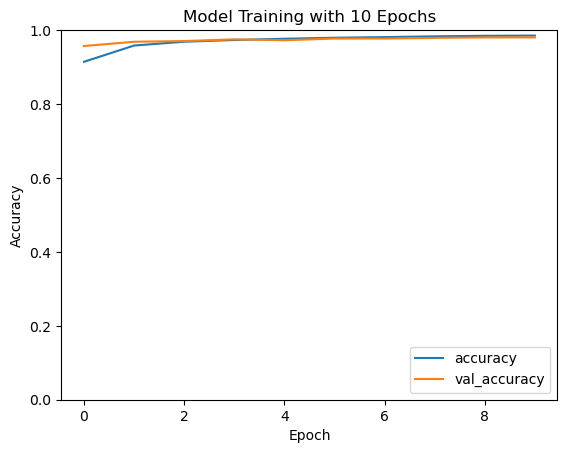


Training model with 15 Epochs

Epoch 1/15
1875/1875 [==============================] - 2s 897us/step - loss: 0.2996 - accuracy: 0.9119 - val_loss: 0.1421 - val_accuracy: 0.9572
Epoch 2/15
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1445 - accuracy: 0.9561 - val_loss: 0.0974 - val_accuracy: 0.9708
Epoch 3/15
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1085 - accuracy: 0.9670 - val_loss: 0.0851 - val_accuracy: 0.9738
Epoch 4/15
1875/1875 [==============================] - 2s 847us/step - loss: 0.0889 - accuracy: 0.9728 - val_loss: 0.0775 - val_accuracy: 0.9766
Epoch 5/15
1875/1875 [==============================] - 2s 858us/step - loss: 0.0753 - accuracy: 0.9761 - val_loss: 0.0755 - val_accuracy: 0.9779
Epoch 6/15
1875/1875 [==============================] - 2s 915us/step - loss: 0.0656 - accuracy: 0.9790 - val_loss: 0.0722 - val_accuracy: 0.9776
Epoch 7/15
1875/1875 [==============================] - 2s 861us/step - loss: 0.0565 - accuracy:

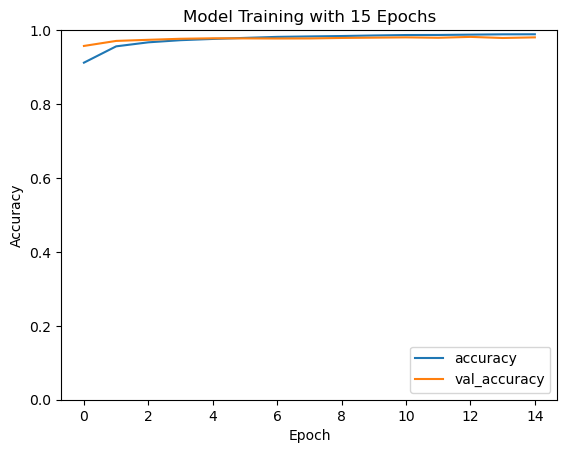

In [7]:
#GRID SEARCH OPTIMISATION usinng learning rate and number of epoches
# Importing necessary libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Load dataset (for demonstration purposes, we'll use a simple dataset)
# Replace this with your own dataset loading code
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Define a simple neural network model
def create_model(learning_rate=0.001):
    model = keras.Sequential([
        layers.Flatten(input_shape=(28, 28)),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(10)
    ])

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer,
                  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])
    return model

# Function to train the model with different learning rates and epochs
def train_model(learning_rate, epochs):
    model = create_model(learning_rate)
    history = model.fit(x_train, y_train, epochs=epochs, validation_data=(x_test, y_test))
    return history

# Experiment with Learning Rate
learning_rates = [0.001, 0.01, 0.1]
epochs = 10

for lr in learning_rates:
    print(f"\nTraining model with Learning Rate: {lr}\n")
    history = train_model(learning_rate=lr, epochs=epochs)
    print("Training completed.\n")

    # Plot training history
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0, 1])
    plt.legend(loc='lower right')
    plt.title(f'Model Training with Learning Rate: {lr}')
    plt.show()

# Experiment with Number of Epochs
learning_rate = 0.001
epochs_list = [5, 10, 15]

for e in epochs_list:
    print(f"\nTraining model with {e} Epochs\n")
    history = train_model(learning_rate=learning_rate, epochs=e)
    print("Training completed.\n")

    # Plot training history
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0, 1])
    plt.legend(loc='lower right')
    plt.title(f'Model Training with {e} Epochs')
    plt.show()




Training with Batch Size: 32 and Optimizer: SGD
Epoch 1/5
1875/1875 [==============================] - 2s 842us/step - loss: 0.6429 - accuracy: 0.8390 - val_loss: 0.3534 - val_accuracy: 0.9056
Epoch 2/5
1875/1875 [==============================] - 1s 766us/step - loss: 0.3343 - accuracy: 0.9071 - val_loss: 0.2896 - val_accuracy: 0.9190
Epoch 3/5
1875/1875 [==============================] - 1s 726us/step - loss: 0.2869 - accuracy: 0.9198 - val_loss: 0.2597 - val_accuracy: 0.9260
Epoch 4/5
1875/1875 [==============================] - 1s 724us/step - loss: 0.2579 - accuracy: 0.9280 - val_loss: 0.2394 - val_accuracy: 0.9326
Epoch 5/5
313/313 [==============================] - 0s 506us/step - loss: 0.2237 - accuracy: 0.9382
Test Accuracy: 93.82%


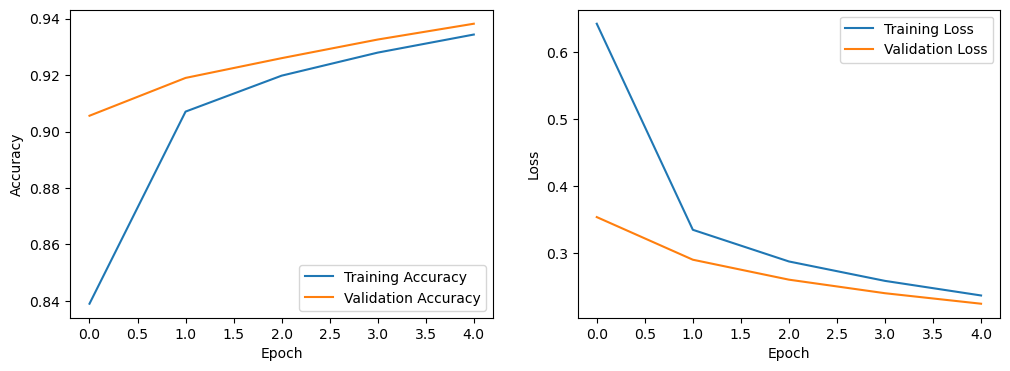


Training with Batch Size: 32 and Optimizer: Adam
Epoch 1/5
1875/1875 [==============================] - 2s 919us/step - loss: 0.2587 - accuracy: 0.9264 - val_loss: 0.1390 - val_accuracy: 0.9595
Epoch 2/5
1875/1875 [==============================] - 2s 905us/step - loss: 0.1137 - accuracy: 0.9664 - val_loss: 0.1036 - val_accuracy: 0.9692
Epoch 3/5
1875/1875 [==============================] - 2s 817us/step - loss: 0.0783 - accuracy: 0.9766 - val_loss: 0.0846 - val_accuracy: 0.9736
Epoch 4/5
1875/1875 [==============================] - 2s 805us/step - loss: 0.0603 - accuracy: 0.9815 - val_loss: 0.0778 - val_accuracy: 0.9769
Epoch 5/5
313/313 [==============================] - 0s 500us/step - loss: 0.0731 - accuracy: 0.9769
Test Accuracy: 97.69%


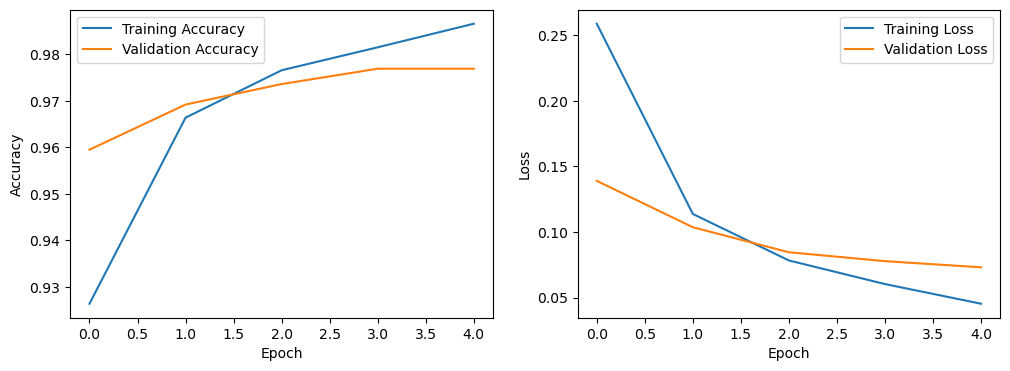


Training with Batch Size: 32 and Optimizer: RMSprop
Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2542 - accuracy: 0.9272 - val_loss: 0.1402 - val_accuracy: 0.9577
Epoch 2/5
1875/1875 [==============================] - 2s 965us/step - loss: 0.1204 - accuracy: 0.9645 - val_loss: 0.1045 - val_accuracy: 0.9685
Epoch 3/5
1875/1875 [==============================] - 2s 962us/step - loss: 0.0882 - accuracy: 0.9744 - val_loss: 0.0890 - val_accuracy: 0.9740
Epoch 4/5
1875/1875 [==============================] - 2s 962us/step - loss: 0.0710 - accuracy: 0.9801 - val_loss: 0.0858 - val_accuracy: 0.9762
Epoch 5/5
313/313 [==============================] - 0s 603us/step - loss: 0.0901 - accuracy: 0.9757
Test Accuracy: 97.57%


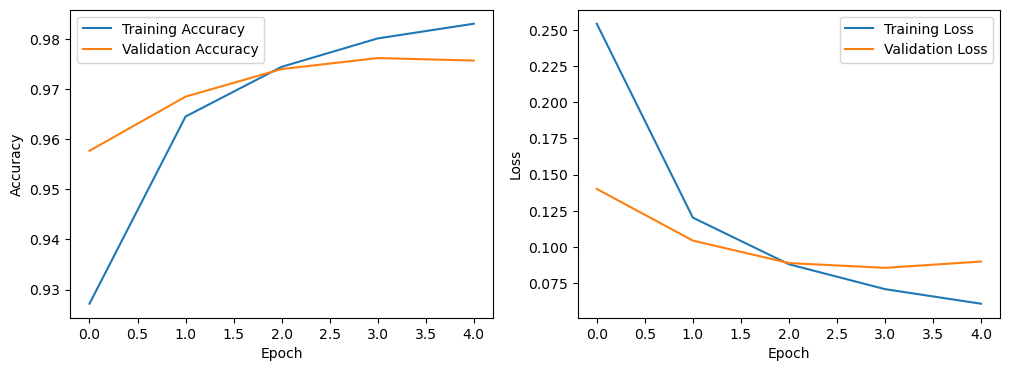


Training with Batch Size: 64 and Optimizer: SGD
Epoch 1/5
938/938 [==============================] - 1s 1ms/step - loss: 0.8808 - accuracy: 0.7864 - val_loss: 0.4609 - val_accuracy: 0.8816
Epoch 2/5
938/938 [==============================] - 1s 976us/step - loss: 0.4200 - accuracy: 0.8880 - val_loss: 0.3599 - val_accuracy: 0.9032
Epoch 3/5
938/938 [==============================] - 1s 930us/step - loss: 0.3549 - accuracy: 0.9021 - val_loss: 0.3210 - val_accuracy: 0.9110
Epoch 4/5
938/938 [==============================] - 1s 900us/step - loss: 0.3224 - accuracy: 0.9097 - val_loss: 0.2968 - val_accuracy: 0.9173
Epoch 5/5
313/313 [==============================] - 0s 520us/step - loss: 0.2798 - accuracy: 0.9216
Test Accuracy: 92.16%


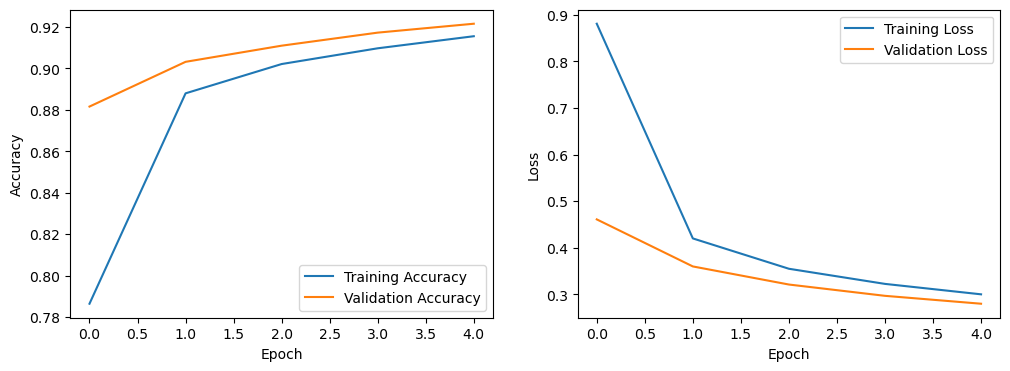


Training with Batch Size: 64 and Optimizer: Adam
Epoch 1/5
938/938 [==============================] - 1s 1ms/step - loss: 0.3052 - accuracy: 0.9154 - val_loss: 0.1589 - val_accuracy: 0.9547
Epoch 2/5
938/938 [==============================] - 1s 1ms/step - loss: 0.1372 - accuracy: 0.9608 - val_loss: 0.1085 - val_accuracy: 0.9686
Epoch 3/5
938/938 [==============================] - 1s 1ms/step - loss: 0.0949 - accuracy: 0.9720 - val_loss: 0.0843 - val_accuracy: 0.9751
Epoch 4/5
938/938 [==============================] - 1s 1ms/step - loss: 0.0718 - accuracy: 0.9791 - val_loss: 0.0818 - val_accuracy: 0.9753
Epoch 5/5
313/313 [==============================] - 0s 507us/step - loss: 0.0740 - accuracy: 0.9780
Test Accuracy: 97.80%


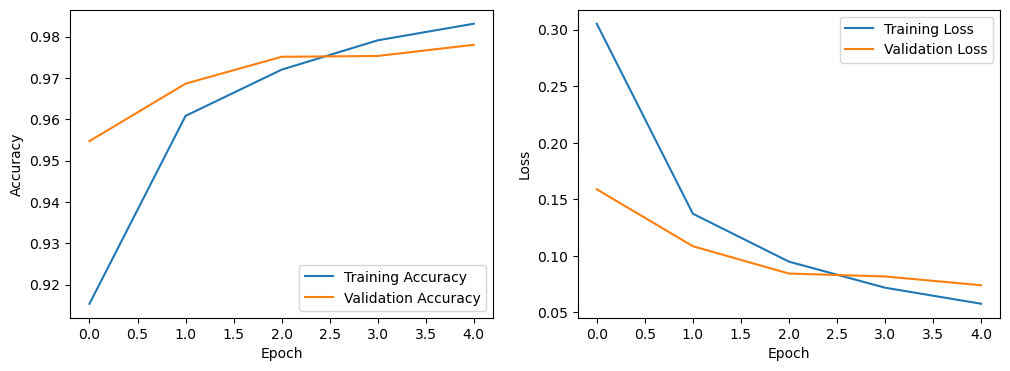


Training with Batch Size: 64 and Optimizer: RMSprop
Epoch 1/5
938/938 [==============================] - 1s 1ms/step - loss: 0.2841 - accuracy: 0.9192 - val_loss: 0.1574 - val_accuracy: 0.9524
Epoch 2/5
938/938 [==============================] - 1s 1ms/step - loss: 0.1326 - accuracy: 0.9612 - val_loss: 0.1114 - val_accuracy: 0.9660
Epoch 3/5
938/938 [==============================] - 1s 1ms/step - loss: 0.0937 - accuracy: 0.9725 - val_loss: 0.0936 - val_accuracy: 0.9726
Epoch 4/5
938/938 [==============================] - 1s 1ms/step - loss: 0.0728 - accuracy: 0.9786 - val_loss: 0.0846 - val_accuracy: 0.9750
Epoch 5/5
313/313 [==============================] - 0s 499us/step - loss: 0.0872 - accuracy: 0.9749
Test Accuracy: 97.49%


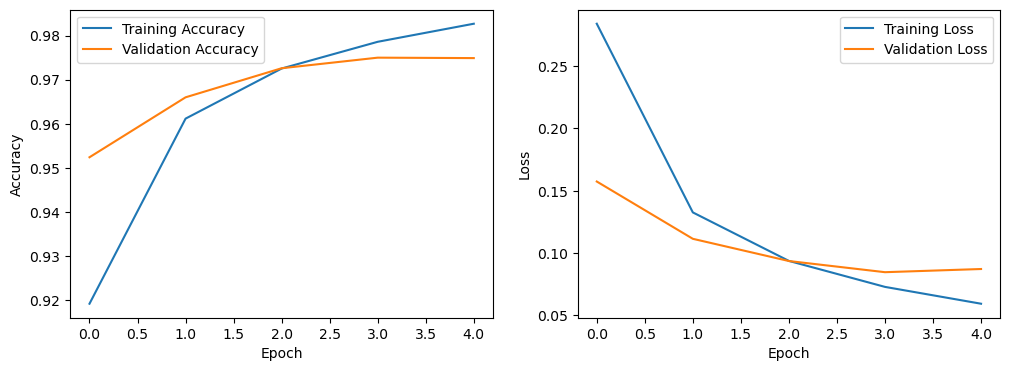


Training with Batch Size: 128 and Optimizer: SGD
Epoch 1/5
469/469 [==============================] - 1s 1ms/step - loss: 1.1774 - accuracy: 0.7187 - val_loss: 0.6328 - val_accuracy: 0.8587
Epoch 2/5
469/469 [==============================] - 1s 1ms/step - loss: 0.5449 - accuracy: 0.8657 - val_loss: 0.4487 - val_accuracy: 0.8879
Epoch 3/5
469/469 [==============================] - 1s 1ms/step - loss: 0.4338 - accuracy: 0.8860 - val_loss: 0.3846 - val_accuracy: 0.9000
Epoch 4/5
469/469 [==============================] - 1s 1ms/step - loss: 0.3843 - accuracy: 0.8964 - val_loss: 0.3495 - val_accuracy: 0.9089
Epoch 5/5
313/313 [==============================] - 0s 516us/step - loss: 0.3267 - accuracy: 0.9116
Test Accuracy: 91.16%


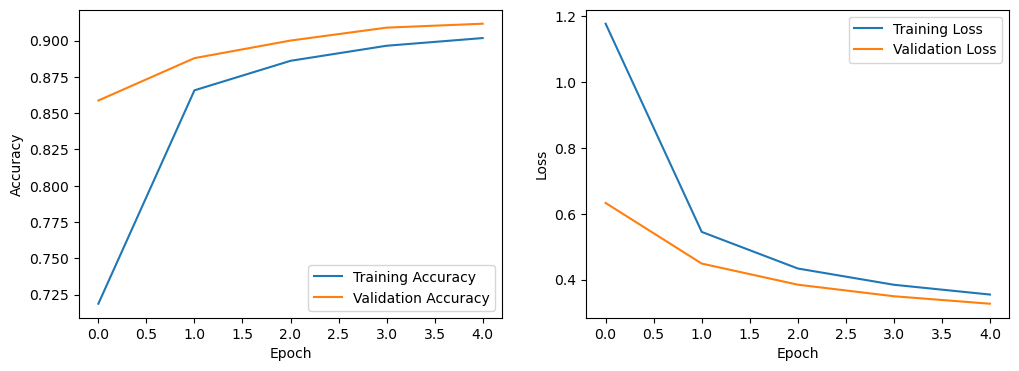


Training with Batch Size: 128 and Optimizer: Adam
Epoch 1/5
469/469 [==============================] - 1s 2ms/step - loss: 0.3634 - accuracy: 0.9005 - val_loss: 0.1979 - val_accuracy: 0.9424
Epoch 2/5
469/469 [==============================] - 1s 1ms/step - loss: 0.1671 - accuracy: 0.9524 - val_loss: 0.1419 - val_accuracy: 0.9581
Epoch 3/5
469/469 [==============================] - 1s 1ms/step - loss: 0.1190 - accuracy: 0.9666 - val_loss: 0.1134 - val_accuracy: 0.9674
Epoch 4/5
469/469 [==============================] - 1s 1ms/step - loss: 0.0928 - accuracy: 0.9734 - val_loss: 0.0945 - val_accuracy: 0.9712
Epoch 5/5
313/313 [==============================] - 0s 507us/step - loss: 0.0862 - accuracy: 0.9729
Test Accuracy: 97.29%


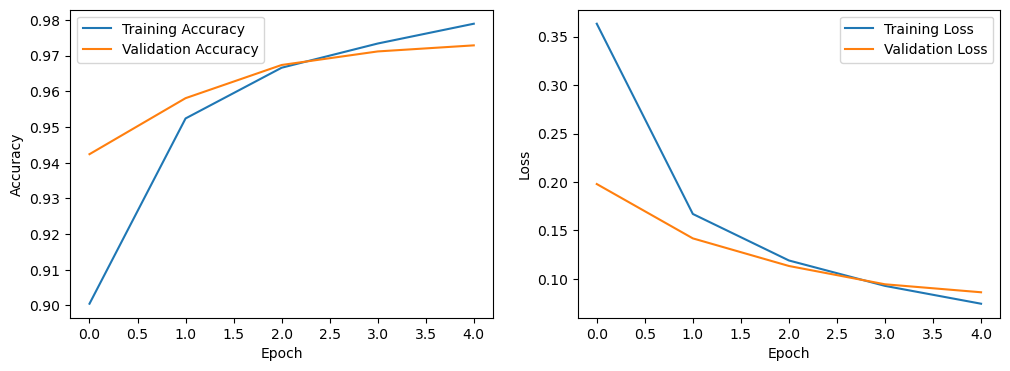


Training with Batch Size: 128 and Optimizer: RMSprop
Epoch 1/5
469/469 [==============================] - 1s 2ms/step - loss: 0.3308 - accuracy: 0.9079 - val_loss: 0.1829 - val_accuracy: 0.9448
Epoch 2/5
469/469 [==============================] - 1s 1ms/step - loss: 0.1569 - accuracy: 0.9542 - val_loss: 0.1287 - val_accuracy: 0.9622
Epoch 3/5
469/469 [==============================] - 1s 1ms/step - loss: 0.1128 - accuracy: 0.9672 - val_loss: 0.1139 - val_accuracy: 0.9671
Epoch 4/5
469/469 [==============================] - 1s 1ms/step - loss: 0.0872 - accuracy: 0.9745 - val_loss: 0.0920 - val_accuracy: 0.9730
Epoch 5/5
313/313 [==============================] - 0s 511us/step - loss: 0.0824 - accuracy: 0.9742
Test Accuracy: 97.42%


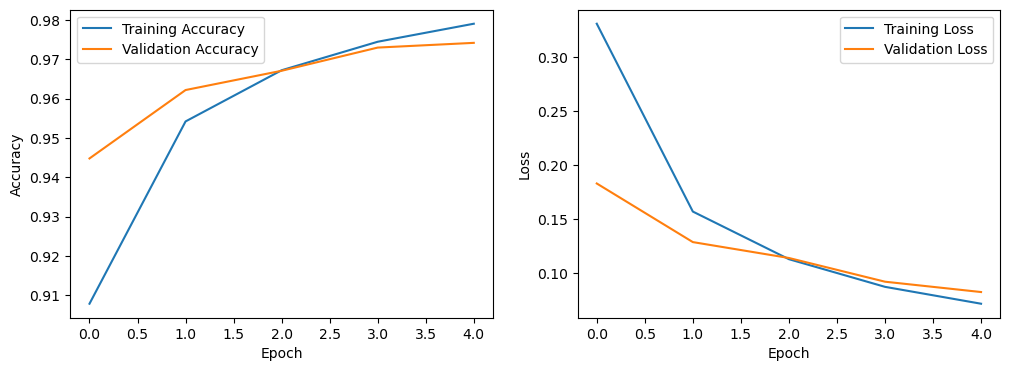

In [9]:
#GRID SEARCH OPTIMISATION using Batch Size and Optimizer 
# Install necessary libraries if not already installed
# !pip install tensorflow numpy

import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD, Adam, RMSprop

# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Flatten the images
x_train, x_test = x_train.reshape((-1, 28*28)), x_test.reshape((-1, 28*28))

# Define a simple neural network model
def create_model(optimizer, batch_size):
    model = Sequential([
        Dense(128, activation='relu', input_shape=(28*28,)),
        Dense(10, activation='softmax')
    ])
    
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

# Experiment with Batch Size and Optimizer
batch_sizes = [32, 64, 128]
optimizers = [SGD(), Adam(), RMSprop()]

for batch_size in batch_sizes:
    for optimizer in optimizers:
        model = create_model(optimizer, batch_size)
        
        print(f"\nTraining with Batch Size: {batch_size} and Optimizer: {optimizer.get_config()['name']}")
        history = model.fit(x_train, y_train, epochs=5, batch_size=batch_size, validation_data=(x_test, y_test))
        
        # Evaluate the model
        test_loss, test_acc = model.evaluate(x_test, y_test)
        print(f"Test Accuracy: {test_acc * 100:.2f}%")

        # Plot training history
        import matplotlib.pyplot as plt

        plt.figure(figsize=(12, 4))

        plt.subplot(1, 2, 1)
        plt.plot(history.history['accuracy'], label='Training Accuracy')
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.plot(history.history['loss'], label='Training Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()

        plt.show()



In [10]:
# Install necessary libraries if not already installed
# !pip install tensorflow numpy

import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from tensorflow.keras.callbacks import TensorBoard

# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Flatten the images
x_train, x_test = x_train.reshape((-1, 28*28)), x_test.reshape((-1, 28*28))

# Define a grid of hyperparameter values
batch_sizes = [32, 64, 128]
optimizers = [SGD(), Adam(), RMSprop()]

# Define TensorBoard callback
tensorboard_callback = TensorBoard(log_dir='./logs', histogram_freq=1)

# Perform grid search
for batch_size in batch_sizes:
    for optimizer in optimizers:
        model = Sequential([
            Dense(128, activation='relu', input_shape=(28*28,)),
            Dense(10, activation='softmax')
        ])

        model.compile(optimizer=optimizer,
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

        print(f"\nTraining with Batch Size: {batch_size} and Optimizer: {optimizer.get_config()['name']}")
        history = model.fit(x_train, y_train, epochs=5, batch_size=batch_size, 
                            validation_data=(x_test, y_test),
                            callbacks=[tensorboard_callback])

        # Evaluate the model
        test_loss, test_acc = model.evaluate(x_test, y_test)
        print(f"Test Accuracy: {test_acc * 100:.2f}%")

# Start TensorBoard using the command: tensorboard --logdir=./logs
#Here is my local host link for the grid search optimisatiom.
#http://localhost:6006/?pinnedCards=%5B%7B%22plugin%22%3A%22scalars%22%2C%22tag%22%3A%22evaluation_loss_vs_iterations%22%7D%2C%7B%22plugin%22%3A%22scalars%22%2C%22tag%22%3A%22evaluation_accuracy_vs_iterations%22%7D%2C%7B%22plugin%22%3A%22scalars%22%2C%22tag%22%3A%22epoch_loss%22%7D%2C%7B%22plugin%22%3A%22scalars%22%2C%22tag%22%3A%22epoch_accuracy%22%7D%5D&darkMode=true#timeseries



Training with Batch Size: 32 and Optimizer: SGD
Epoch 1/5
1875/1875 [==============================] - 2s 926us/step - loss: 0.6477 - accuracy: 0.8399 - val_loss: 0.3525 - val_accuracy: 0.9072
Epoch 2/5
1875/1875 [==============================] - 2s 881us/step - loss: 0.3334 - accuracy: 0.9069 - val_loss: 0.2892 - val_accuracy: 0.9217
Epoch 3/5
1875/1875 [==============================] - 2s 915us/step - loss: 0.2846 - accuracy: 0.9206 - val_loss: 0.2569 - val_accuracy: 0.9300
Epoch 4/5
1875/1875 [==============================] - 2s 836us/step - loss: 0.2544 - accuracy: 0.9285 - val_loss: 0.2333 - val_accuracy: 0.9349
Epoch 5/5
313/313 [==============================] - 0s 529us/step - loss: 0.2145 - accuracy: 0.9401


Test Accuracy: 94.01%

Training with Batch Size: 32 and Optimizer: Adam
Epoch 1/5
1875/1875 [==============================] - 2s 975us/step - loss: 0.2620 - accuracy: 0.9248 - val_loss: 0.1497 - val_accuracy: 0.9547
Epoch 2/5
1875/1875 [==============================] - 2s 976us/step - loss: 0.1146 - accuracy: 0.9660 - val_loss: 0.0927 - val_accuracy: 0.9712
Epoch 3/5
1875/1875 [==============================] - 2s 948us/step - loss: 0.0775 - accuracy: 0.9771 - val_loss: 0.0877 - val_accuracy: 0.9736
Epoch 4/5
1875/1875 [==============================] - 2s 936us/step - loss: 0.0583 - accuracy: 0.9820 - val_loss: 0.0787 - val_accuracy: 0.9761
Epoch 5/5
313/313 [==============================] - 0s 511us/step - loss: 0.0715 - accuracy: 0.9774
Test Accuracy: 97.74%



Training with Batch Size: 32 and Optimizer: RMSprop
Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2487 - accuracy: 0.9280 - val_loss: 0.1490 - val_accuracy: 0.9573
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1161 - accuracy: 0.9659 - val_loss: 0.1056 - val_accuracy: 0.9698
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0854 - accuracy: 0.9747 - val_loss: 0.0938 - val_accuracy: 0.9733
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0701 - accuracy: 0.9797 - val_loss: 0.0909 - val_accuracy: 0.9735
Epoch 5/5
313/313 [==============================] - 0s 640us/step - loss: 0.0909 - accuracy: 0.9738


Test Accuracy: 97.38%

Training with Batch Size: 64 and Optimizer: SGD
Epoch 1/5
938/938 [==============================] - 1s 1ms/step - loss: 0.8845 - accuracy: 0.7826 - val_loss: 0.4544 - val_accuracy: 0.8871
Epoch 2/5
938/938 [==============================] - 1s 1ms/step - loss: 0.4127 - accuracy: 0.8900 - val_loss: 0.3504 - val_accuracy: 0.9078
Epoch 3/5
938/938 [==============================] - 1s 1ms/step - loss: 0.3465 - accuracy: 0.9043 - val_loss: 0.3133 - val_accuracy: 0.9122
Epoch 4/5
938/938 [==============================] - 1s 1ms/step - loss: 0.3133 - accuracy: 0.9129 - val_loss: 0.2875 - val_accuracy: 0.9207
Epoch 5/5
313/313 [==============================] - 0s 534us/step - loss: 0.2693 - accuracy: 0.9253


Test Accuracy: 92.53%

Training with Batch Size: 64 and Optimizer: Adam
Epoch 1/5
938/938 [==============================] - 2s 1ms/step - loss: 0.3039 - accuracy: 0.9147 - val_loss: 0.1694 - val_accuracy: 0.9500
Epoch 2/5
938/938 [==============================] - 1s 1ms/step - loss: 0.1369 - accuracy: 0.9608 - val_loss: 0.1273 - val_accuracy: 0.9607
Epoch 3/5
938/938 [==============================] - 1s 1ms/step - loss: 0.0961 - accuracy: 0.9711 - val_loss: 0.0919 - val_accuracy: 0.9709
Epoch 4/5
938/938 [==============================] - 1s 1ms/step - loss: 0.0725 - accuracy: 0.9787 - val_loss: 0.0843 - val_accuracy: 0.9734
Epoch 5/5
313/313 [==============================] - 0s 520us/step - loss: 0.0737 - accuracy: 0.9780
Test Accuracy: 97.80%



Training with Batch Size: 64 and Optimizer: RMSprop
Epoch 1/5
938/938 [==============================] - 1s 1ms/step - loss: 0.2932 - accuracy: 0.9183 - val_loss: 0.1541 - val_accuracy: 0.9543
Epoch 2/5
938/938 [==============================] - 1s 1ms/step - loss: 0.1363 - accuracy: 0.9606 - val_loss: 0.1094 - val_accuracy: 0.9674
Epoch 3/5
938/938 [==============================] - 1s 1ms/step - loss: 0.0956 - accuracy: 0.9727 - val_loss: 0.1104 - val_accuracy: 0.9674
Epoch 4/5
938/938 [==============================] - 1s 1ms/step - loss: 0.0748 - accuracy: 0.9776 - val_loss: 0.0850 - val_accuracy: 0.9746
Epoch 5/5
313/313 [==============================] - 0s 523us/step - loss: 0.0754 - accuracy: 0.9783


Test Accuracy: 97.83%

Training with Batch Size: 128 and Optimizer: SGD
Epoch 1/5
469/469 [==============================] - 1s 1ms/step - loss: 1.1888 - accuracy: 0.7060 - val_loss: 0.6456 - val_accuracy: 0.8506
Epoch 2/5
469/469 [==============================] - 1s 1ms/step - loss: 0.5560 - accuracy: 0.8606 - val_loss: 0.4577 - val_accuracy: 0.8843
Epoch 3/5
469/469 [==============================] - 1s 1ms/step - loss: 0.4414 - accuracy: 0.8835 - val_loss: 0.3904 - val_accuracy: 0.8971
Epoch 4/5
469/469 [==============================] - 1s 1ms/step - loss: 0.3903 - accuracy: 0.8945 - val_loss: 0.3548 - val_accuracy: 0.9031
Epoch 5/5
313/313 [==============================] - 0s 517us/step - loss: 0.3326 - accuracy: 0.9076


Test Accuracy: 90.76%

Training with Batch Size: 128 and Optimizer: Adam
Epoch 1/5
469/469 [==============================] - 1s 2ms/step - loss: 0.3577 - accuracy: 0.9010 - val_loss: 0.1941 - val_accuracy: 0.9424
Epoch 2/5
469/469 [==============================] - 1s 2ms/step - loss: 0.1643 - accuracy: 0.9535 - val_loss: 0.1348 - val_accuracy: 0.9606
Epoch 3/5
469/469 [==============================] - 1s 1ms/step - loss: 0.1164 - accuracy: 0.9674 - val_loss: 0.1081 - val_accuracy: 0.9674
Epoch 4/5
469/469 [==============================] - 1s 1ms/step - loss: 0.0899 - accuracy: 0.9750 - val_loss: 0.0896 - val_accuracy: 0.9723
Epoch 5/5
313/313 [==============================] - 0s 517us/step - loss: 0.0866 - accuracy: 0.9736


Test Accuracy: 97.36%

Training with Batch Size: 128 and Optimizer: RMSprop
Epoch 1/5
469/469 [==============================] - 1s 2ms/step - loss: 0.3282 - accuracy: 0.9093 - val_loss: 0.1854 - val_accuracy: 0.9479
Epoch 2/5
469/469 [==============================] - 1s 2ms/step - loss: 0.1578 - accuracy: 0.9539 - val_loss: 0.1292 - val_accuracy: 0.9619
Epoch 3/5
469/469 [==============================] - 1s 2ms/step - loss: 0.1119 - accuracy: 0.9676 - val_loss: 0.1039 - val_accuracy: 0.9684
Epoch 4/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0860 - accuracy: 0.9755 - val_loss: 0.0945 - val_accuracy: 0.9716
Epoch 5/5
313/313 [==============================] - 0s 500us/step - loss: 0.0887 - accuracy: 0.9744
Test Accuracy: 97.44%


In [16]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import TensorBoard
from sklearn.model_selection import ParameterSampler
import numpy as np

# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Flatten the images
x_train, x_test = x_train.reshape((-1, 28*28)), x_test.reshape((-1, 28*28))

# Define hyperparameter search space
param_grid = {
    'learning_rate': [0.001, 0.01, 0.1],
    'neurons': [64, 128, 256],
    'activation': ['relu', 'elu', 'leaky_relu']
}

# Randomly sample hyperparameter combinations
random_search_iterations = 5
random_search_samples = list(ParameterSampler(param_grid, n_iter=random_search_iterations, random_state=42))

# Define TensorBoard callback
tensorboard_callback = TensorBoard(log_dir='./logs_random_search', histogram_freq=1)

# Perform random search
for i, params in enumerate(random_search_samples, 1):
    print(f"\nRandom Search Iteration {i} - Hyperparameters: {params}")
    
    model = Sequential([
        Dense(params['neurons'], activation=params['activation'], input_shape=(28*28,)),
        Dense(10, activation='softmax')
    ])

    optimizer = SGD(learning_rate=params['learning_rate'])
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    # Training
    history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test),
                        callbacks=[tensorboard_callback])

    # Evaluate the model
    test_loss, test_acc = model.evaluate(x_test, y_test)
    print(f"Test Accuracy: {test_acc * 100:.2f}%")

# Start TensorBoard using the command:  tensorboard --logdir=./logs_random_search
# Here is my link for the random search function
#http://localhost:6006/?pinnedCards=%5B%7B%22plugin%22%3A%22scalars%22%2C%22tag%22%3A%22evaluation_loss_vs_iterations%22%7D%2C%7B%22plugin%22%3A%22scalars%22%2C%22tag%22%3A%22evaluation_accuracy_vs_iterations%22%7D%5D&darkMode=true#timeseries




Random Search Iteration 1 - Hyperparameters: {'neurons': 256, 'learning_rate': 0.1, 'activation': 'relu'}
Epoch 1/5
938/938 [==============================] - 1s 1ms/step - loss: 0.3612 - accuracy: 0.9000 - val_loss: 0.2112 - val_accuracy: 0.9383
Epoch 2/5
938/938 [==============================] - 1s 1ms/step - loss: 0.1899 - accuracy: 0.9462 - val_loss: 0.1688 - val_accuracy: 0.9510
Epoch 3/5
938/938 [==============================] - 1s 1ms/step - loss: 0.1404 - accuracy: 0.9603 - val_loss: 0.1232 - val_accuracy: 0.9641
Epoch 4/5
938/938 [==============================] - 1s 1ms/step - loss: 0.1123 - accuracy: 0.9689 - val_loss: 0.1073 - val_accuracy: 0.9678
Epoch 5/5
313/313 [==============================] - 0s 591us/step - loss: 0.0957 - accuracy: 0.9705


Test Accuracy: 97.05%

Random Search Iteration 2 - Hyperparameters: {'neurons': 128, 'learning_rate': 0.01, 'activation': 'elu'}
Epoch 1/5
938/938 [==============================] - 1s 1ms/step - loss: 0.7859 - accuracy: 0.8053 - val_loss: 0.4461 - val_accuracy: 0.8852
Epoch 2/5
938/938 [==============================] - 1s 1ms/step - loss: 0.4204 - accuracy: 0.8857 - val_loss: 0.3630 - val_accuracy: 0.9008
Epoch 3/5
938/938 [==============================] - 1s 1ms/step - loss: 0.3665 - accuracy: 0.8977 - val_loss: 0.3341 - val_accuracy: 0.9076
Epoch 4/5
938/938 [==============================] - 1s 1ms/step - loss: 0.3404 - accuracy: 0.9047 - val_loss: 0.3151 - val_accuracy: 0.9128
Epoch 5/5
313/313 [==============================] - 0s 555us/step - loss: 0.3027 - accuracy: 0.9161


Test Accuracy: 91.61%

Random Search Iteration 3 - Hyperparameters: {'neurons': 64, 'learning_rate': 0.001, 'activation': 'elu'}
Epoch 1/5
938/938 [==============================] - 1s 983us/step - loss: 1.8434 - accuracy: 0.4576 - val_loss: 1.4603 - val_accuracy: 0.6608
Epoch 2/5
938/938 [==============================] - 1s 905us/step - loss: 1.2569 - accuracy: 0.7151 - val_loss: 1.0581 - val_accuracy: 0.7697
Epoch 3/5
938/938 [==============================] - 1s 919us/step - loss: 0.9660 - accuracy: 0.7820 - val_loss: 0.8423 - val_accuracy: 0.8114
Epoch 4/5
938/938 [==============================] - 1s 1ms/step - loss: 0.8018 - accuracy: 0.8146 - val_loss: 0.7150 - val_accuracy: 0.8350
Epoch 5/5
313/313 [==============================] - 0s 486us/step - loss: 0.6337 - accuracy: 0.8522


Test Accuracy: 85.22%

Random Search Iteration 4 - Hyperparameters: {'neurons': 64, 'learning_rate': 0.01, 'activation': 'leaky_relu'}
Epoch 1/5
938/938 [==============================] - 1s 916us/step - loss: 0.9019 - accuracy: 0.7717 - val_loss: 0.4782 - val_accuracy: 0.8791
Epoch 2/5
938/938 [==============================] - 1s 815us/step - loss: 0.4336 - accuracy: 0.8834 - val_loss: 0.3740 - val_accuracy: 0.8978
Epoch 3/5
938/938 [==============================] - 1s 816us/step - loss: 0.3685 - accuracy: 0.8978 - val_loss: 0.3353 - val_accuracy: 0.9066
Epoch 4/5
938/938 [==============================] - 1s 822us/step - loss: 0.3376 - accuracy: 0.9055 - val_loss: 0.3135 - val_accuracy: 0.9112
Epoch 5/5
313/313 [==============================] - 0s 466us/step - loss: 0.2982 - accuracy: 0.9145


Test Accuracy: 91.45%

Random Search Iteration 5 - Hyperparameters: {'neurons': 64, 'learning_rate': 0.001, 'activation': 'relu'}
Epoch 1/5
938/938 [==============================] - 1s 878us/step - loss: 2.0149 - accuracy: 0.3967 - val_loss: 1.6996 - val_accuracy: 0.6371
Epoch 2/5
938/938 [==============================] - 1s 783us/step - loss: 1.4730 - accuracy: 0.7043 - val_loss: 1.2272 - val_accuracy: 0.7760
Epoch 3/5
938/938 [==============================] - 1s 789us/step - loss: 1.1039 - accuracy: 0.7828 - val_loss: 0.9450 - val_accuracy: 0.8166
Epoch 4/5
938/938 [==============================] - 1s 785us/step - loss: 0.8882 - accuracy: 0.8139 - val_loss: 0.7822 - val_accuracy: 0.8359
Epoch 5/5
313/313 [==============================] - 0s 461us/step - loss: 0.6808 - accuracy: 0.8513
Test Accuracy: 85.13%
